In [1]:
#Disable autosave
%autosave 0

Autosave disabled


We are going to skip the hard way because we are lazy programmers!

It's there as a resource to understand how the correlation coefficient is calculated.

In [2]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from pydataset import data

Let's do an example from the mpg dataset.

In [3]:
#Read in mpg dataset
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [4]:
#Check datatypes
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [5]:
#This column is numerical, but is it continuous? NO!
mpg.cyl.value_counts()

4    81
6    79
8    70
5     4
Name: cyl, dtype: int64

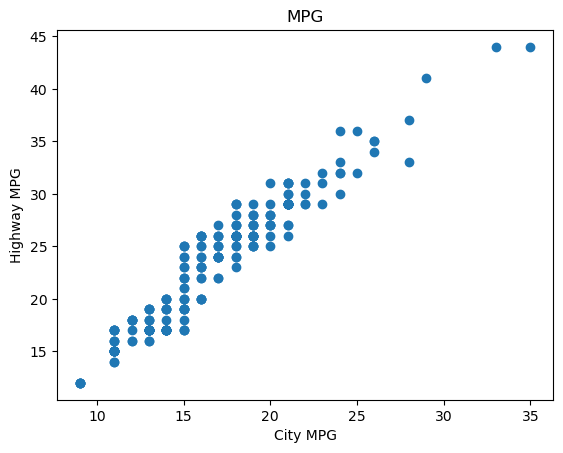

In [6]:
#Scatter plot of continuous variables
plt.scatter(mpg.cty, mpg.hwy)
plt.xlabel('City MPG')
plt.ylabel('Highway MPG')
plt.title('MPG')
plt.show()

In [7]:
#Correlation test
r, p = stats.pearsonr(mpg.cty, mpg.hwy)
r, p

(0.9559159136495713, 1.8683071952666785e-125)

The r-value of 0.96 indicates there is a strong, positive correlation between city and highway MPG.

In [8]:
#Function to evaluate p values
def eval_result(p_value, a = 0.05):
    
    if p_value < a:
        
        print('Cool beans! Your result is significant!')
        
    else:
        
        print('Your result was not significant!')

In [9]:
#Call the function
eval_result(p)

Cool beans! Your result is significant!


Let's look at a limitation of the Pearson's r test with a non-linear relationship.

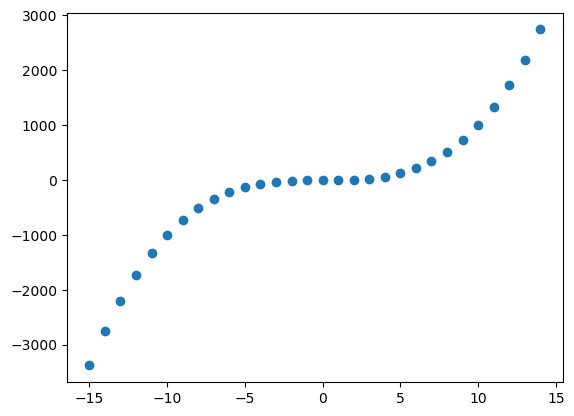

In [10]:
#Define values and plot
x = list(range(-15, 15, 1))
y = [i ** 3 for i in x]

plt.scatter(x, y)
plt.show()

In [11]:
#Conduct correlation test and evaluate result
r_cubed, p_cubed = stats.pearsonr(x, y)
eval_result(p_cubed)

Cool beans! Your result is significant!


In [12]:
r_cubed

0.915178278514944

The correlation test returns a significant result and a high r value, indicating a strong, linear relationship. From the plot, we know this isn't true! This is a limitation of the test, since it only checks for linear relationships.

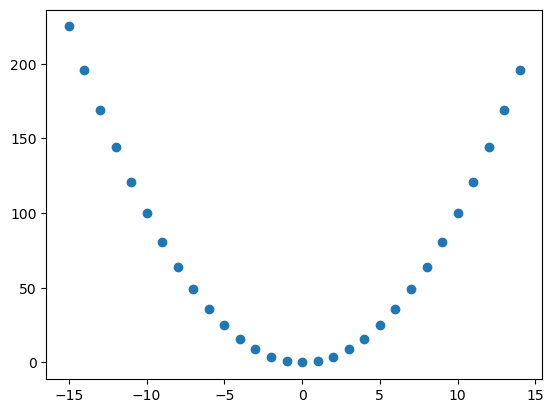

In [13]:
#Define values and plot
x_square = list(range(-15, 15, 1))
y_square = [i ** 2 for i in x]

plt.scatter(x_square, y_square)

In [14]:
#Conduct test and evaluate
r_sq, p_sq = stats.pearsonr(x_square, y_square)
eval_result(p_sq)

Your result was not significant!


Our result is not significant, yet we can see a relationship between the data! Again, Pearson's r is only testing for a linear relationship between the two features of the dataset.

Let's look at another limitation with a linear relationship that doesn't do much.

(0.0, 75.0)

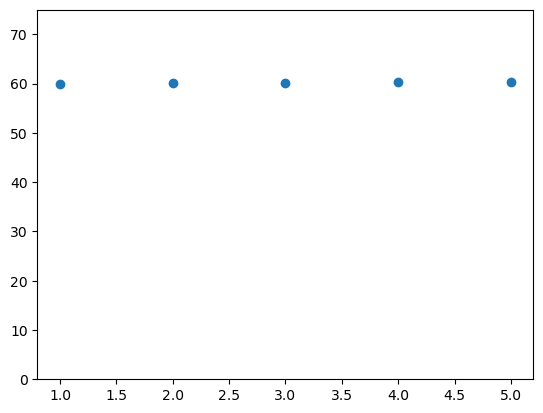

In [15]:
#Define values. Important to set ylim so it's not deceptive!
x_not = [1, 2, 3, 4, 5]
y_not = [60, 60.1, 60.2, 60.3, 60.4]

plt.scatter(x_not, y_not)
plt.ylim(0, 75)

In [16]:
#Run test and evaluate
r_not, p_not = stats.pearsonr(x_not, y_not)
eval_result(p_not)

Cool beans! Your result is significant!


In [17]:
#INSANE correlation!
r_not

0.9999999999999999

Even though we get a strong correlation and a significant result, it's clear that y is not changing much with x. This is why it's important to include the visual aid with the stats test.

Bonus! You don't need to try this today! It's super useful for next week on. We can call functions inside of other functions!

In [18]:
def find_correlation(feature_one, feature_two):
    
    r, p = stats.pearsonr(feature_one, feature_two)
    
    eval_result(p)

In [19]:
find_correlation(x_not, y_not)

Cool beans! Your result is significant!
